<a href="https://colab.research.google.com/github/matheusfsm/Data-Science-Projects/blob/master/Palmer_penguins_ML_Class_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

### **Description:**
---


#### About the data:

The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to iris.

<figure>
  <p align=center>
<img src="https://github.com/allisonhorst/palmerpenguins/blob/master/man/figures/lter_penguins.png?raw=true" width=100%">
<figcaption> <p align=center> <font size="2">
The Palmer Archipelago penguins. Artwork by @allison_horst</figcaption> </p>






---

#### Summary:

*   ```species```: penguin species (Chinstrap, Adélie, or Gentoo)
*   ```bill_length_mm```: culmen (bill) length (mm)
*   ```bill_depth_mm```: culmen (bill) depth (mm)
*   ```flipper_length_mm```: flipper length (mm)
*   ```body_mass_g```: body mass (g)
*   ```island```: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
*   ```sex```: penguin sex

---

#### !!! Important:


*  > #####  **Bill dimensions:**
  *   The culmen is the upper ridge of a bird’s bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm to be more intuitive.
For this penguin data, the culmen (bill) length and depth are measured as shown below (thanks *Kristen Gorman* for clarifying!):


<figure>
  <p align=center>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=70%">

<figure>
  <p align=center>
<img src="https://pbs.twimg.com/media/EaAXQn8U4AAoKUj.jpg:small" width=70%">


<figcaption> <p align=center> <font size="2">
The Palmer Archipelago penguins. Artwork by @allison_horst </figcaption> </p>

#### Source raw data: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv

---

### Goals:
*   ##### Use machine learning models that can classify penguin species accurately.
*   ##### Comment on the process steps as well as the parameters.

### My analytical workflow:

1.   Set up the programming environment by loading packages
2.   Import my data
3.   Check out my data
4.   Explore my data
5.   Model my data
6.   Communicate what I've learned

# 1- Set up the programming environment by loading packages:

In [ ]:
# import packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning libraries
from sklearn import metrics

## Import my data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating data path
DATA_PATH = pd.read_csv('/content/drive/MyDrive/Data_sample_DS/penguins.csv')

In [ ]:
# create variable as df
df = DATA_PATH

## Exploratory Data Analysis (EDA):



### What is EDA?
> "In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task."


In [ ]:
# showing some rows
# head function show the first 5 rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [ ]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


 Context:
*   This data set has 7 columns (variables).
*   This data set has 3 cathegorical variables.
*   This data set has no missing values.
*   This data set has 4 numerical variables where 2 are float numbers and 2 are int numbers.
---

In [ ]:
# describe 'function' show a resume the information
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Context:
*   This data set has 333 rows to each variable.
*   The mean to ```bill_lenght_mm``` is ~44 mm.
*   The mean to ```bill_depth_mm``` is ~17 mm.
*   The mean to ```flipper_length_mm``` is ~200mm.
*   The mean to ```body_mass_g``` is ~4207g - ~4.2kg

---

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


[]

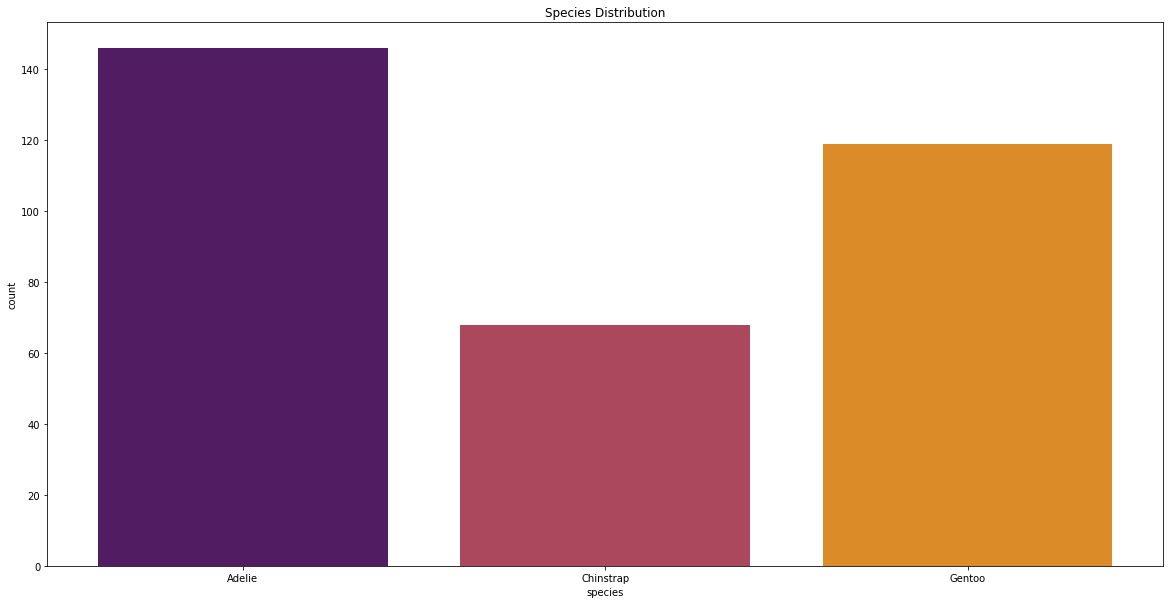

In [ ]:
# data balancing
print(df.species.value_counts())

# Count plot for species
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x='species', palette='inferno' )
ax.set_title('Species Distribution')
plt.plot()

In [ ]:
perc_for_species = (df["species"].value_counts().unique() / df["species"].value_counts().sum()) * 100
perc_for_Adelie = round(perc_for_species[0])
perc_for_Chinstrap = round(perc_for_species[1])
perc_for_Gentoo = round(perc_for_species[2])

print('Adelie represent {}%  of dataset entries.'. format(perc_for_Adelie))
print('Chinstrap represent {}%  of dataset entries.'. format(perc_for_Chinstrap))
print('Gentoo represent {}%  of dataset entries.'. format(perc_for_Gentoo))

Adelie represent 44%  of dataset entries.
Chinstrap represent 36%  of dataset entries.
Gentoo represent 20%  of dataset entries.


Context:
*   We can say that our dataset is imbalanced.
*   In the future, we will address this inconsistency and apply the classification model to both conditions.

---

### What is correlation?
> "When we talk about data analysis, we often need to understand what the association between two or more variables is. In this case, correlation analysis is a descriptive form that measures whether there is and what degree of dependence between variables, that is, how much one variable interferes with another, remembering that this dependence relationship may or may not be causal. This measure of the degree of relationship is measured through coefficients."

Deepen your knowledge [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

### How can we interpret the values that **ρ** can represent?
*  ρ = 0.9 to 1 (positive or negative): very strong;
*  ρ = 0.7 to 09 (positive or negative): strong;
*  ρ = 0.5 to 0.7 (positive or negative): moderate;
*  ρ = 0.3 to 0.5 (positive or negative): weak;
*  ρ = 0 to 0.3 (positive or negative): none.

The correlation value can say that 'var x' increases or decreases as a function of 'var y', or nothing happens when we don't have a correlation.



### What is pairplot?

> The pair plot is based on two basic figures, the histogram, and the scatterplot. Diagonal plots allow you to see the distribution of a single variable, while scatter plots in the upper and lower triangles show the relationship (or lack thereof) between two variables.

[]

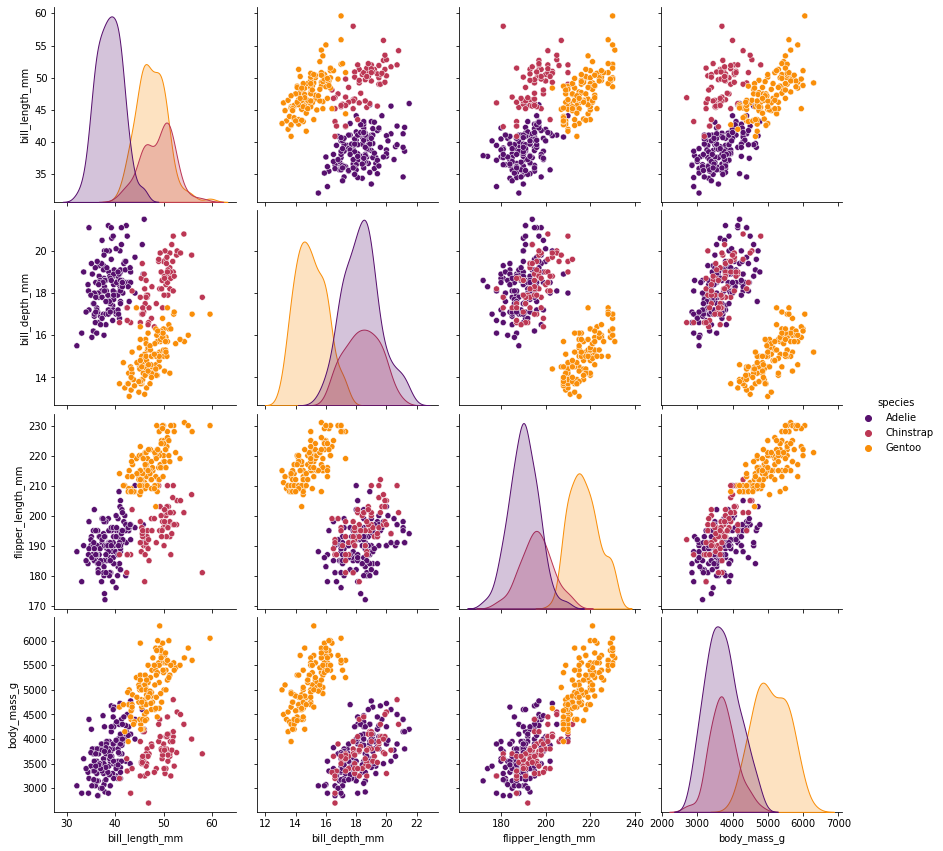

In [ ]:
# Defining graph, hue means de variable to map, diag_kind = diagonal graph type.
sns.pairplot(df, hue='species', kind='scatter',
             diag_kind='kde',palette='inferno',height=3)
plt.plot()

Context:

*  We can see through some graphs linear relationships, while others do not show such a relationship.

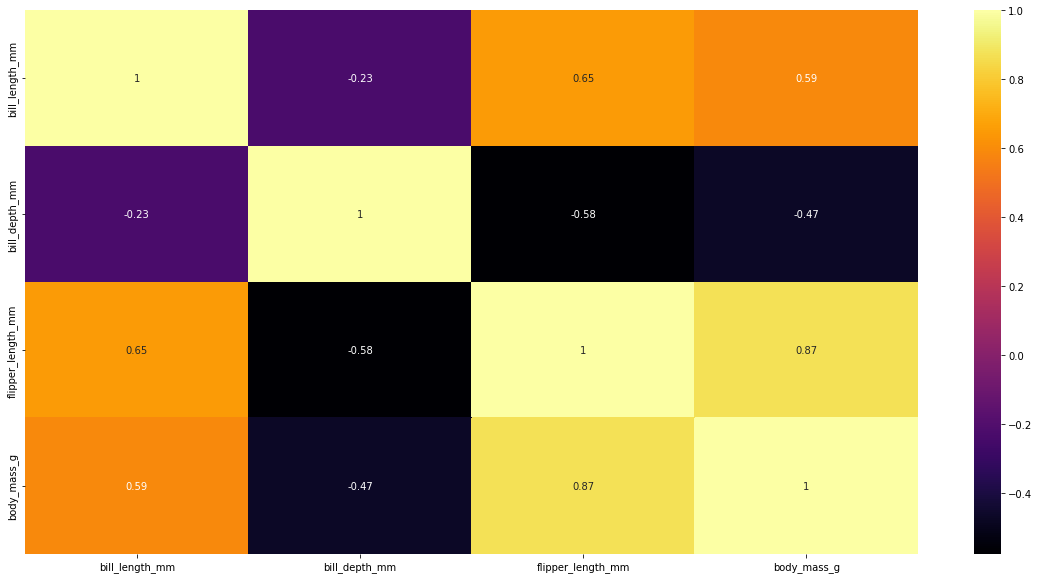

In [ ]:
# Understanding correlations with heatmap:
fig, ax = plt.subplots(figsize=(20, 10))
corrmat = df.corr()
sns.heatmap(corrmat,annot=True,cmap='inferno')
plt.show()

Context:

*  The ```flipper_length_mm``` has a strong positive correlation with ```body_mass_g``` (0.87).
*  The ```flipper_length_mm``` has a moderate positive correlation with ```bill_lenght_mm``` (0.65).
*  The ```body_mass_g``` has a moderate positive correlation with ```bill_lenght_mm``` (0.59).
*  The ```flipper_length_mm``` has a moderate negative correlation with ```bill_depth_mm``` (-0.58).
*  The ```body_mass_g``` has a moderate negative correlation with ```bill_depth_mm``` (-0.47).
*  The ```bill_lenght_mm``` has no correlation with ```bill_depth_mm``` (-0.23).

1.   When the flippers increase, does body mass increase?
2.   When bill length is longer, are the flippers also longer?
3.   When bill length is longer, does body mass increase?
4.   When the flippers decrease, does the bill depth also decrease?
5.   When the bill depth decreases, does body mass also decrease?
6.   Only bill dimensions don't have a significant correlation.

When it comes to some animal species, these questions might make sense, you can see my image [(Penguins Species Image)](https://www.canva.com/design/DAE2yBIzA8g/view)












---

### What is boxplot?

> The boxplot or box diagram is a graphical tool that allows you to visualize the distribution and outliers of the data, thus providing a complementary means to develop a perspective on the character of the data.


<p align=center>
<img src="https://www.researchgate.net/publication/303779929/figure/fig6/AS:372438601879567@1465807690659/The-main-components-of-a-boxplot-median-quartiles-whiskers-fences-and-outliers.png"width="60%"></p>


* Outlier: Discrepant data.
* Maximum Value: Highest value in the dataset disregarding **Outliers**.
* Third Quartile: Represents 75% of the data.
* Second Quartile (Median): Represents 50% of the data.
* First Quartile: Represents 25% of the data.
* Minimum Value: Lowest Value in the dataset disregarding **Outliers**.


> The figure below is very well related to the *boxplot* and a probability density function of a population that follows a normal distribution $N(0, 1\sigma^2)$.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1920px-Boxplot_vs_PDF.svg.png"width="400px"></center>

---

#### We can use boxplot to detect outliers by species and drop this data punctually.

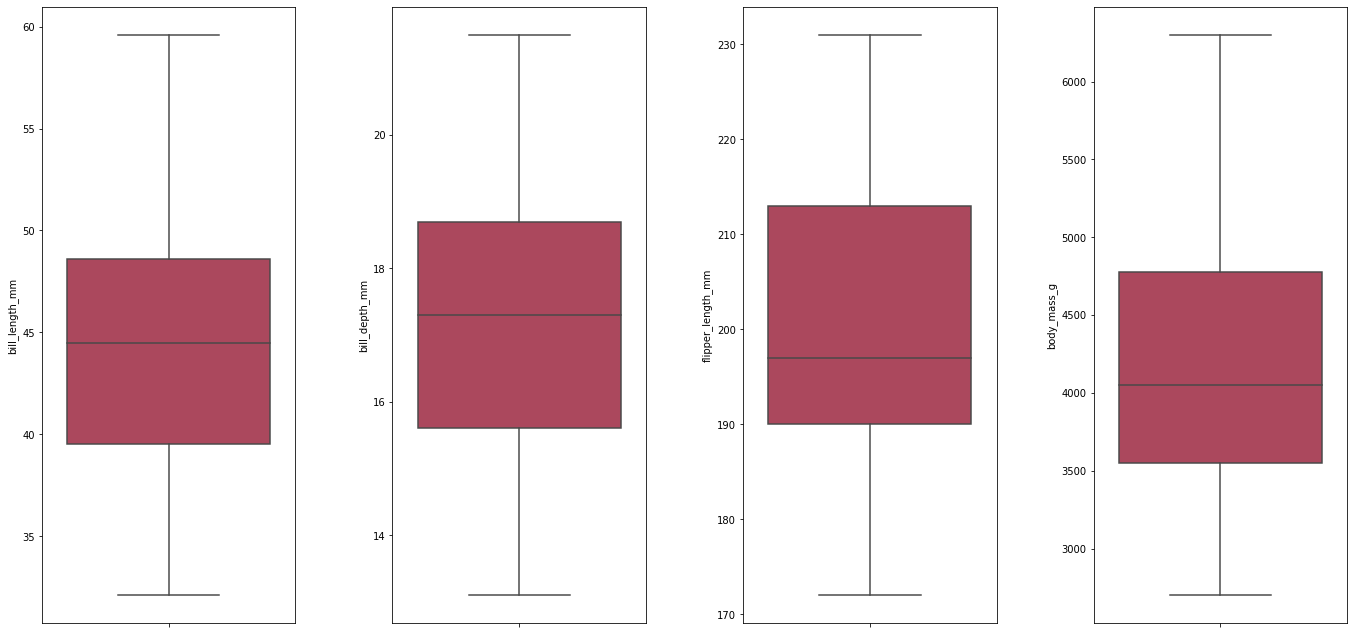

In [ ]:
fig, ax = plt.subplots(1, 4,figsize=(20, 10))
sns.boxplot(y= df['bill_length_mm'], palette='inferno', ax=ax[0])
sns.boxplot(y= df['bill_depth_mm'], palette='inferno', ax=ax[1])
sns.boxplot(y= df['flipper_length_mm'], palette='inferno', ax=ax[2])
sns.boxplot(y= df['body_mass_g'], palette='inferno', ax=ax[3])

# set the spacing between subplots
fig.tight_layout(pad=5.0)
plt.show()

#### IQR Score Method:

In [ ]:
# defining Q1 and Q3  and IQR Score for ```bill_length_mm´´´
q1_bill_length_mm = df.bill_length_mm.quantile(.25)
q3_bill_length_mm = df.bill_length_mm.quantile(.75)
iqr_bill_length_mm = q3_bill_length_mm - q1_bill_length_mm

# defining limits
sup_lim_bill_length_mm = q3_bill_length_mm + 1.5 * iqr_bill_length_mm
inf_lim_bill_length_mm = q1_bill_length_mm - 1.5 * iqr_bill_length_mm

print('Upper Limit', sup_lim_bill_length_mm)
print('Inferior Limit:', inf_lim_bill_length_mm)

print('{} Values above {}'.format(len(df[df.bill_length_mm > sup_lim_bill_length_mm]),sup_lim_bill_length_mm))
print('{} Values below {}'.format(len(df[df.bill_length_mm < inf_lim_bill_length_mm]), inf_lim_bill_length_mm))


Upper Limit 62.25
Inferior Limit: 25.849999999999998
0 Values above 62.25
0 Values below 25.849999999999998


In [ ]:
# defining Q1 and Q3  and IQR Score for ```bill_depth_mm´´´
q1_bill_depth_mm = df.bill_depth_mm.quantile(.25)
q3_bill_depth_mm = df.bill_depth_mm.quantile(.75)
iqr_bill_depth_mm = q3_bill_depth_mm - q1_bill_depth_mm

# defining limits
sup_lim_bill_depth_mm = q3_bill_depth_mm + 1.5 * iqr_bill_depth_mm
inf_lim_bill_depth_mm = q1_bill_depth_mm - 1.5 * iqr_bill_depth_mm

print('Upper Limit', sup_lim_bill_depth_mm)
print('Inferior Limit:', inf_lim_bill_depth_mm)

print('{} Values above {}'.format(len(df[df.bill_depth_mm > sup_lim_bill_depth_mm]),sup_lim_bill_depth_mm))
print('{} Values below {}'.format(len(df[df.bill_depth_mm < inf_lim_bill_depth_mm]),inf_lim_bill_depth_mm))

Upper Limit 23.349999999999998
Inferior Limit: 10.95
0 Values above 23.349999999999998
0 Values below 10.95


In [ ]:
# defining Q1 and Q3  and IQR Score for ```flipper_length_mm´´´
q1_flipper_length_mm = df.flipper_length_mm.quantile(.25)
q3_flipper_length_mm = df.flipper_length_mm.quantile(.75)
iqr_flipper_length_mm = q3_flipper_length_mm - q1_flipper_length_mm

# defining limits
sup_lim_flipper_length_mm = q3_flipper_length_mm + 1.5 * iqr_flipper_length_mm
inf_lim_flipper_length_mm = q1_flipper_length_mm - 1.5 * iqr_flipper_length_mm

print('Upper Limit', sup_lim_flipper_length_mm)
print('Inferior Limit:', inf_lim_flipper_length_mm)

print('{} Values above {}'.format(len(df[df.flipper_length_mm > sup_lim_flipper_length_mm]),sup_lim_flipper_length_mm))
print('{} Values below {}'.format(len(df[df.flipper_length_mm < inf_lim_flipper_length_mm]),inf_lim_flipper_length_mm))

Upper Limit 247.5
Inferior Limit: 155.5
0 Values above 247.5
0 Values below 155.5


In [ ]:
# defining Q1 and Q3  and IQR Score for ```body_mass_g´´´
q1_body_mass_g = df.body_mass_g.quantile(.25)
q3_body_mass_g = df.body_mass_g.quantile(.75)
iqr_body_mass_g = q3_body_mass_g - q1_body_mass_g

# defining limits
sup_lim_body_mass_g = q3_body_mass_g + 1.5 * iqr_body_mass_g
inf_lim_body_mass_g = q1_body_mass_g - 1.5 * iqr_body_mass_g

print('Upper Limit', sup_lim_body_mass_g)
print('Inferior Limit:', inf_lim_body_mass_g)

print('{} Values above {}'.format(len(df[df.body_mass_g > sup_lim_body_mass_g]),sup_lim_body_mass_g))
print('{} Values below {}'.format(len(df[df.body_mass_g < inf_lim_body_mass_g]),inf_lim_body_mass_g))

Upper Limit 6612.5
Inferior Limit: 1712.5
0 Values above 6612.5
0 Values below 1712.5


Context:
*  After the application of the IQR Score and the graphic visualization with boxplot, we can see that **there are no outliers** for the numerical variables.
*  Another approach is to check whether there are discrepant data at deeper levels between numerical variables *versus* species.

---

## Classification Models:
> When fitting machine learning algorithms (like linear regression, logistic regression, random forests, etc.), we often convert categorical variables to dummy variables, which are numeric variables that are used to represent categorical data.

In [ ]:
# convert categorical variable into dummy/indicator variables.
dummies = pd.get_dummies(df, drop_first=True)
dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181,3750,0,0,0,1,1
1,39.5,17.4,186,3800,0,0,0,1,0
2,40.3,18.0,195,3250,0,0,0,1,0
3,36.7,19.3,193,3450,0,0,0,1,0
4,39.3,20.6,190,3650,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214,4925,0,1,0,0,0
329,46.8,14.3,215,4850,0,1,0,0,0
330,50.4,15.7,222,5750,0,1,0,0,1
331,45.2,14.8,212,5200,0,1,0,0,0


Context:
*  Now the species variable has been transformed into two variables where the number 1 defines which of the species the previous data corresponds to, and if it is 0 for Chinstrap and Gentoo, we assume they correspond to Adelie.
*  The same happens with the island variable.
*  For the sex variable, 1 for males 0 for females.

#### Data Scaler:
> When fitting machine learning algorithms (like linear regression, logistic regression, random forests, etc.), we often convert categorical variables to dummy variables, which are numeric variables that are used to represent categorical data.

>  Core of the method: The main idea is to normalize/standardize ie μ=0e σ=1your features/variables/columns of X, individually, before applying any machine learning model.

> ```StandardScaler()``` will normalize the features, i.e. each column of X, INDIVIDUALLY , so that each column/feature/variable will have μ = 0 and σ = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
variables = ['bill_length_mm', 'bill_depth_mm',
             'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler().fit_transform(dummies[variables])
new_df = pd.DataFrame(scaler, columns=variables)

Context:
*  This is because our data are on different scales, for example, variables with measurements in mm and the variable with body weight in grams, so our model can misinterpret the data.

In [ ]:
# Incorporating dummy variables into the new dataframe
var_dummies = ['species_Chinstrap', 'species_Gentoo',
               'island_Dream', 'island_Torgersen', 'sex_MALE']

new_df[var_dummies] = dummies[var_dummies]

In [ ]:
# separating variables in X e y to classify species
X = new_df[new_df.columns.difference(['species_Chinstrap', 'species_Gentoo'])]
y = new_df[['species_Chinstrap', 'species_Gentoo']]

In [ ]:
# dividing into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

#### Decision Tree:

In [ ]:
from sklearn import tree

mod = tree.DecisionTreeClassifier(max_depth=3)
mod.fit(X_train, y_train)
prediction1 = mod.predict(X_test)
metrics.accuracy_score(prediction1, y_test)

0.9552238805970149

#### Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier()
mod.fit(X_train, y_train)
prediction2 = mod.predict(X_test)
metrics.accuracy_score(prediction2, y_test)

0.9552238805970149

## Clustering Method:
>  Now, considering that we don't have the species column, use the KMeans method to cluster the test data used for the previous classification.

#### Kmeans:

In [ ]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=3)
prediction3 = k_means.fit_predict(X_train)
prediction3

array([1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 1], dtype=int32)

In [ ]:
new_train = []
for index, row in y_train.iterrows():
    if row['species_Chinstrap'] == 1 and row['species_Gentoo'] == 0:
        new_train.append('species_Chinstrap')
    elif row['species_Chinstrap'] == 0 and row['species_Gentoo'] == 1:
        new_train.append('species_Gentoo')
    else:
        new_train.append('species_Adelie')
new_train = pd.DataFrame(new_train)

In [ ]:
di = {'species_Gentoo': 1, 'species_Chinstrap': 0, 'species_Adelie': 2}
y_train_num = new_train.replace(di)

In [ ]:
metrics.accuracy_score(prediction, y_train_num)

0.943609022556391

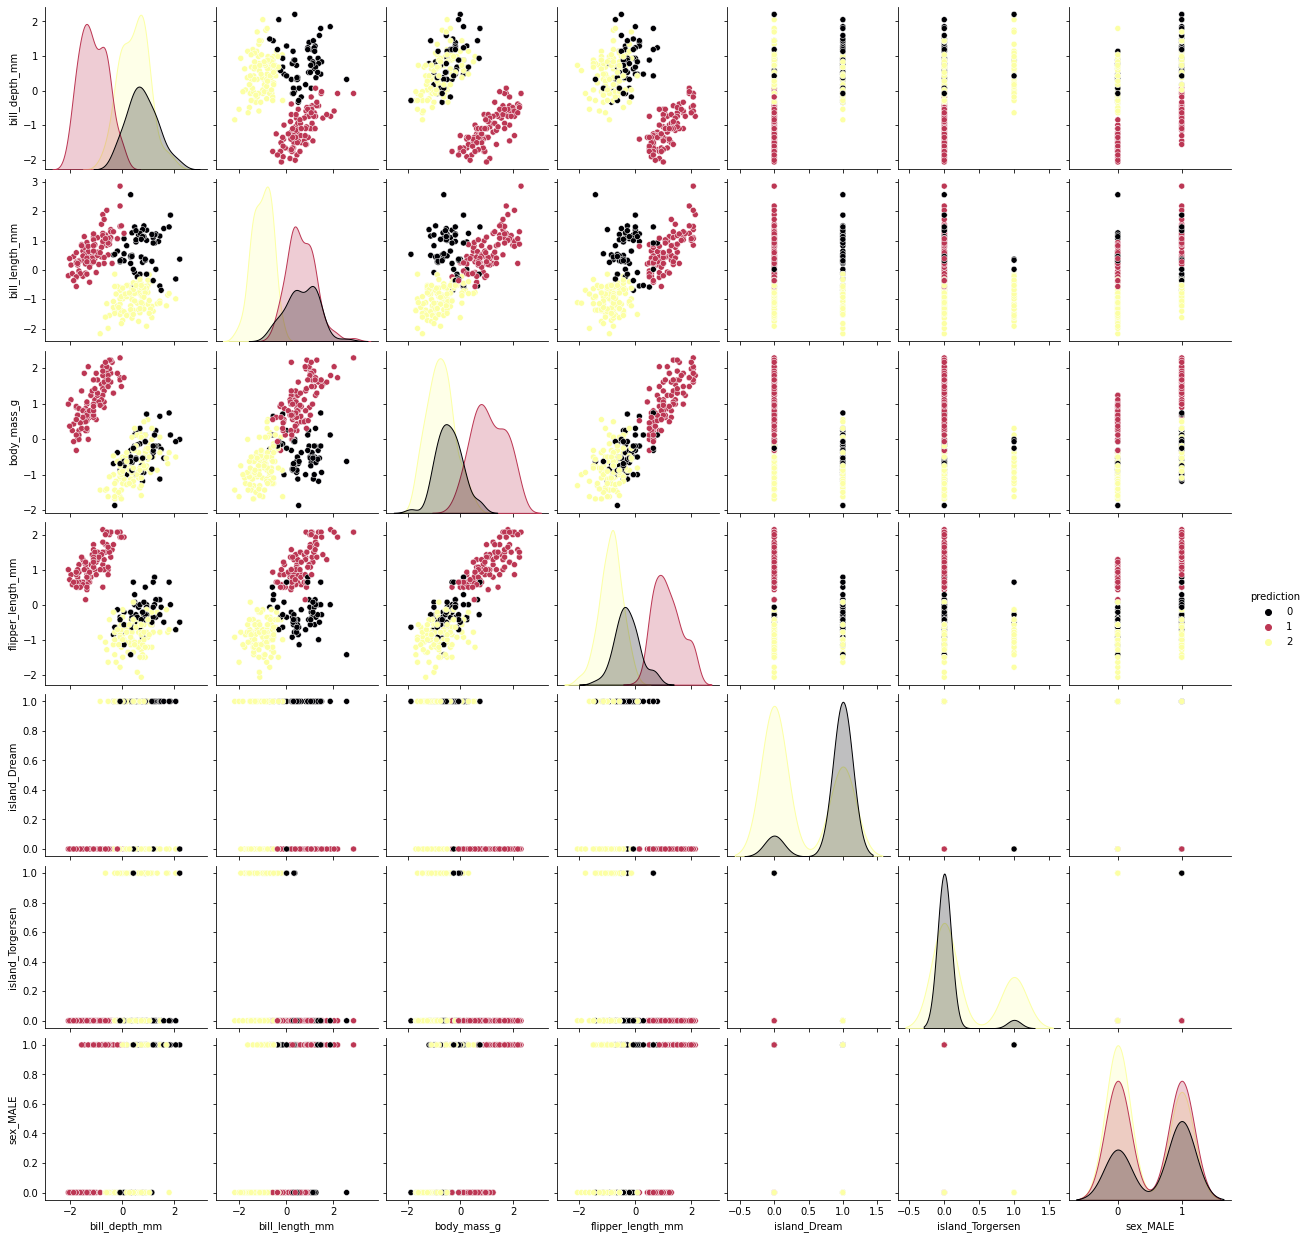

In [ ]:
X_train['prediction'] = prediction
sns.pairplot(X_train, hue='prediction', palette='inferno')
plt.show()

# References:

#### **Data originally published in**:

*   Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

#### **Data citations**:
#### Adélie penguins:

*   Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2020-06-08).

#### Gentoo penguins:

*   Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2020-06-08).

#### Chinstrap penguins:

*   Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2020-06-08).